## Analysis of a Buck-Boost Converter

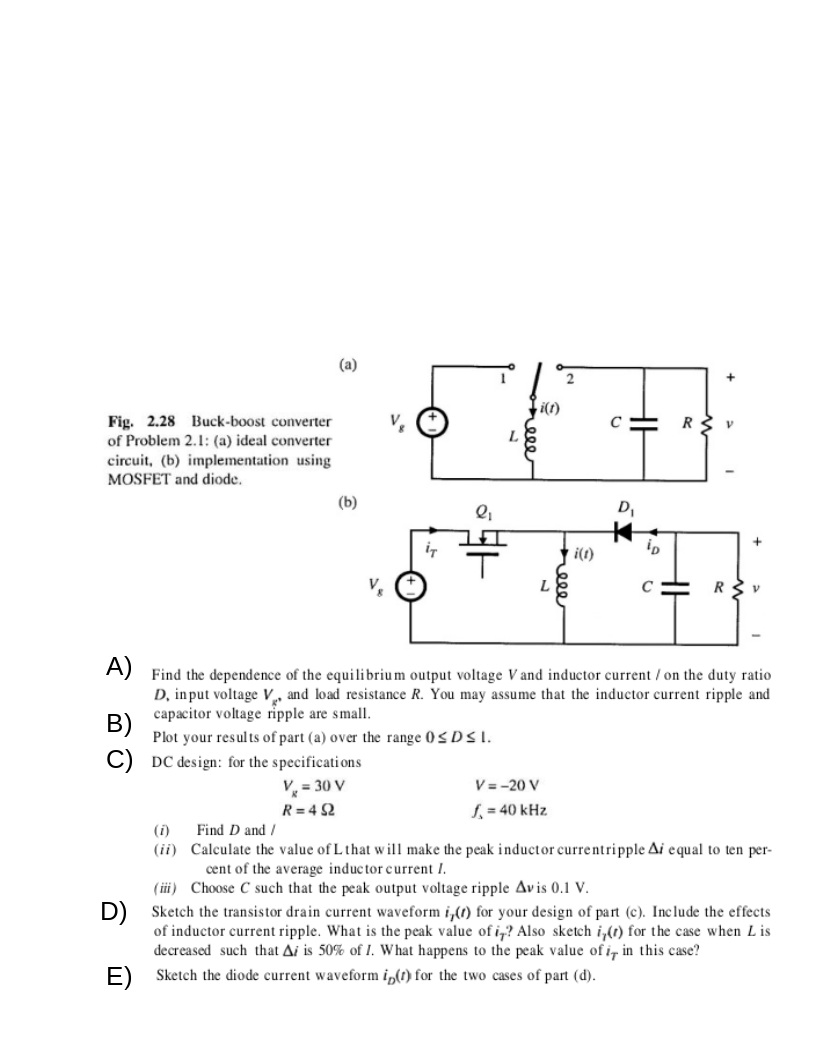

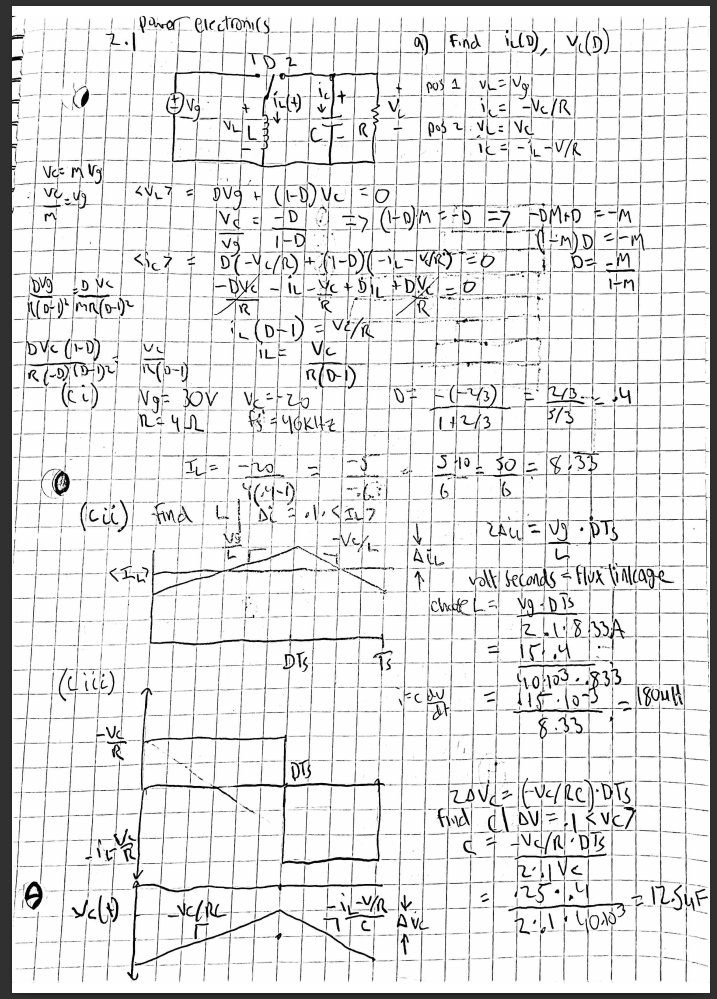

### Import what is needed

In [1]:
from IPython.display import display, Latex
from functools import wraps
from orderedset import OrderedSet
import sympy
from sympy.core.symbol import symbols, Symbol
from sympy.solvers.solveset import nonlinsolve
from sympy import solveset
from sympy import Eq
from sympy.utilities.lambdify import lambdify
from sympy.printing import latex, pprint
from sympy import Symbol, simplify
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter

from math import log10
from PyLTSpice import LTSpice_RawRead
from sympy.solvers import solve
import sys
import logging
from ipywidgets import FloatSlider, interact, interactive
from converter5 import * #works acceptably with converter3

Found Numpy. WIll be used for storing data


In [2]:
logformat = '{asctime}\n{message}'
logger = logging.getLogger(__name__)
if logger.hasHandlers():
    #handlers somehow stay alive even after restarting iPython
    #console and clearing variables
    logger.handlers.clear()

logger.setLevel('DEBUG')
print(logger)
print(__name__)
# Use FileHandler() to log to a file
file_handler = logging.FileHandler('Problem2-1.log', mode='w')
formatter = logging.Formatter(fmt=logformat, style='{' )
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

<Logger __main__ (DEBUG)>
__main__


### Define Symbols

In [3]:
def make_symbols():
    global R, C, L, D, s, Vc, Vg, VL, iin, iL, iC, iR, fs, M, delta_iL, delta_vC, Ts
    
    R = variable('R', 'ohms', None, real=True, positive=True)
    C = variable('C', 'F', None, real=True, positive=True)
    L = variable('L', 'H', real=True, positive=True)
    D = variable('D', '%', real=True, positive=True)
    
    fs = variable('f_s', 'Hz', real=True, positive=True)
    

    Vc = variable('V_c', 'V', real=True)
    Vg = variable('V_g', 'V', real= True)
    VL = variable('V_L', 'V', real= True)

    iin = variable('i_in', 'A', real=True)
    iL = variable('i_L', 'A', real=True)
    iC = variable('i_C', 'A', real=True)
    iR = variable('i_R', 'A', real=True)
    delta_iL = variable('\Delta i_L', 'A', 'delta_iL', real=True)
    delta_vC = variable('\Delta v_C', 'V', 'detla_vC', real=True)
    M = variable('M', real=True)
    
    return
make_symbols()

### Part (a) - finding average inductor current and capacitor voltage as function of D, Vg, R

In [4]:
buckboost = converter()
buckboost.equations.add(D*Vg + (1-D)*Vc - 0) #VLavg must equal 0 in steady state
buckboost.equations.add(M - Vc/Vg)
buckboost.showequations()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
myprint(Vc, *buckboost.solver(given={}, want=Vc))
myprint(M, *buckboost.solver(given={}, want=M))

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 49: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 70-72: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 51-59: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

<IPython.core.display.Latex object>

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\eriki\AppData\Local\Temp/ipykernel_6268/988950996.py", line 2, in <module>
    myprint(M, *buckboost.solver(given={}, want=M))
  File "C:\GitRepos\PowerElectronics\converter5.py", line 249, in solver
    solutions = self.solver(given, sym, recursesym=recursesym)
  File "C:\GitRepos\PowerElectronics\converter5.py", line 249, in solver
    solutions = self.solver(given, sym, recursesym=recursesym)
  File "C:\GitRepos\PowerElectronics\converter5.py", line 229, in s

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 61-63: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

<IPython.core.display.Latex object>

A note on polarity - For 0 < D < 1, Vc is always opposite polarity of Vg. 

In [6]:

print(f' Vc computation test1: {buckboost.computesym(Vc, {M:-2, Vg:5})}')
print(f' Vc computation test2: {buckboost.computesym(Vc, {Vg:10, M:3})}')
print(f' Vc computation test3: {buckboost.computesym(Vc, {Vg:10, D:.3})}')
print(f' M computation test1: {buckboost.computesym(M, {Vc:-10, Vg:5})}')
print(f' M computation test2: {buckboost.computesym(M, {D:.4})}')




 Vc computation test1: -10
 Vc computation test2: 30
 Vc computation test3: -4.285714285714286
 M computation test1: -2.0
 M computation test2: -0.6666666666666667


#### Our next equation from hand analysis is capacitor charge balance = 0. From it, we can find average inductor current.

In [7]:
eq2 = D*(-Vc/R)+(1-D)*(-iL-Vc/R) - 0 #iCavg must equal 0 in steady state
buckboost.equations.add(eq2)
eq3 = R - Vc/iR
buckboost.equations.add(eq3)
buckboost.showequations()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
ans =buckboost.solver(given={}, want=iL)
myprint(iL, *ans)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 59-67: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 59-67: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 49: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 61-63: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 30: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 49-51: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 46-48: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 49-57: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 39: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

<IPython.core.display.Latex object>

The inductor current is positive, from the switch node to ground. The output voltage and load current are negative, with respect to how they were drawn. 

In [9]:
print(f' iL computation test1: {buckboost.computesym(iL, {R:2, Vc:5, D:.9})}')
print(f' iL computation test2: {buckboost.computesym(iL, {D:.2, iR:50})}')

 iL computation test1: -25.000000000000007
 iL computation test2: -62.5


### Part (B) - plotting
- plot output voltage (same as capacitor voltage) as function of D
- plot average inductor current as function of D, for a few different loads.
- Note that iR = Vc/R

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


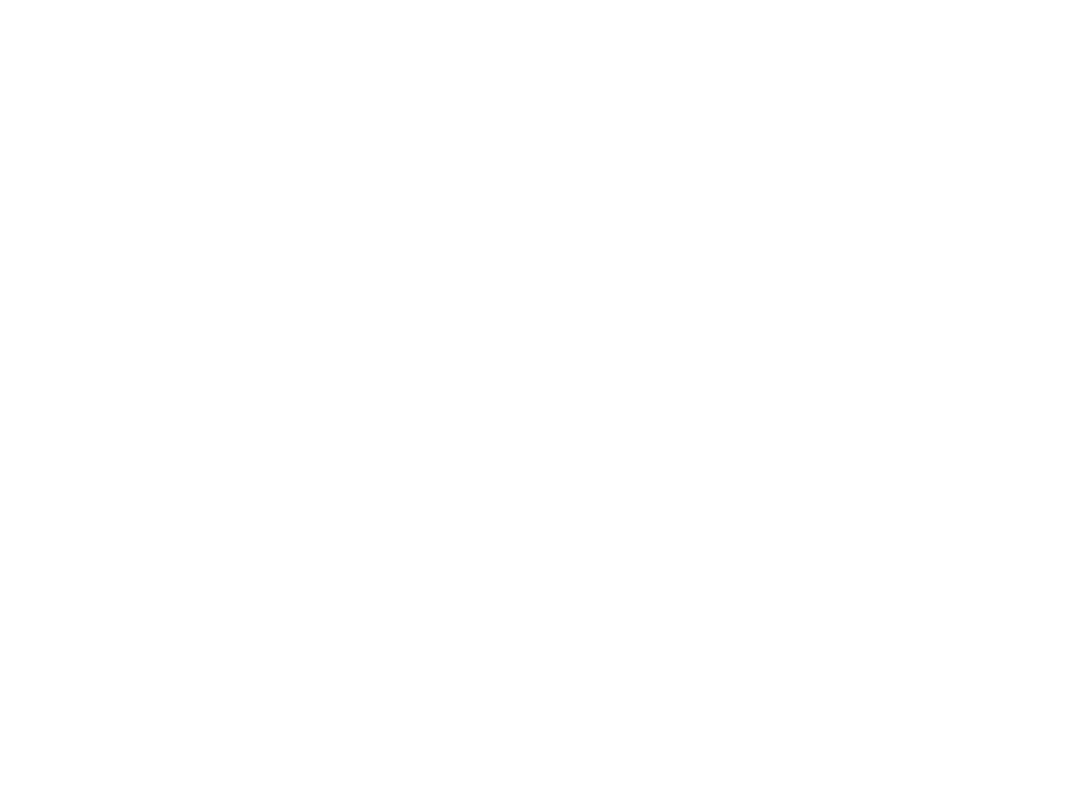

<IPython.core.display.Javascript object>


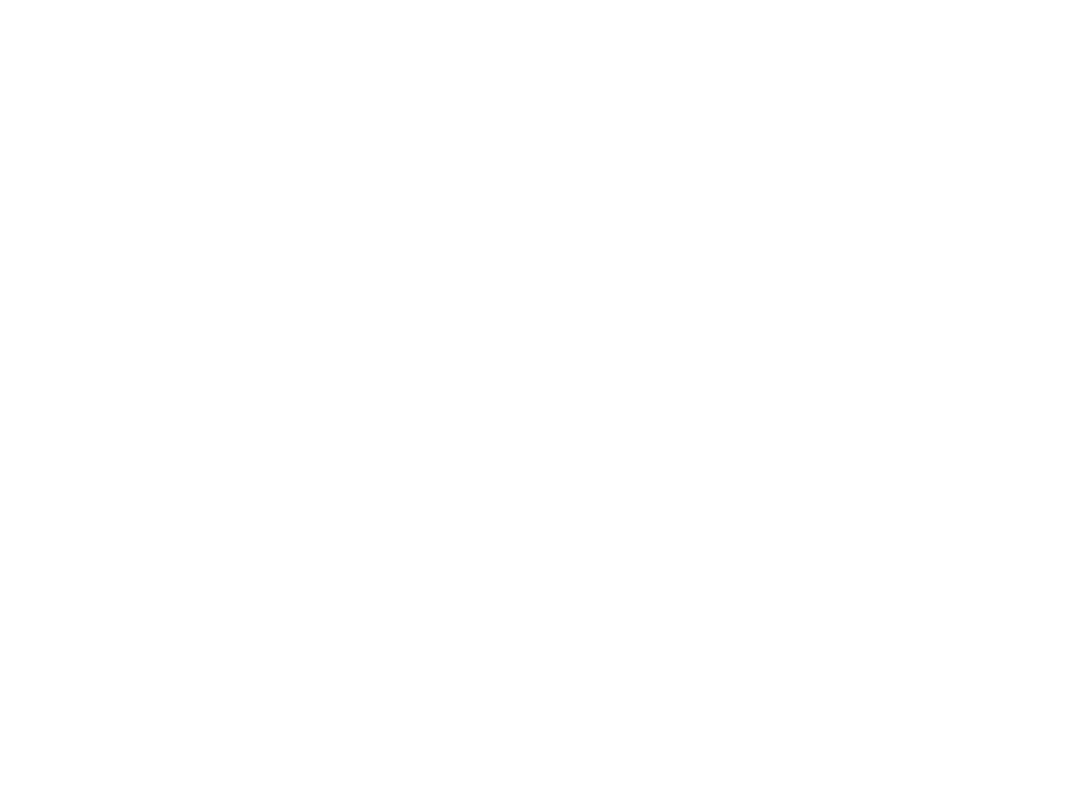

<IPython.core.display.Javascript object>


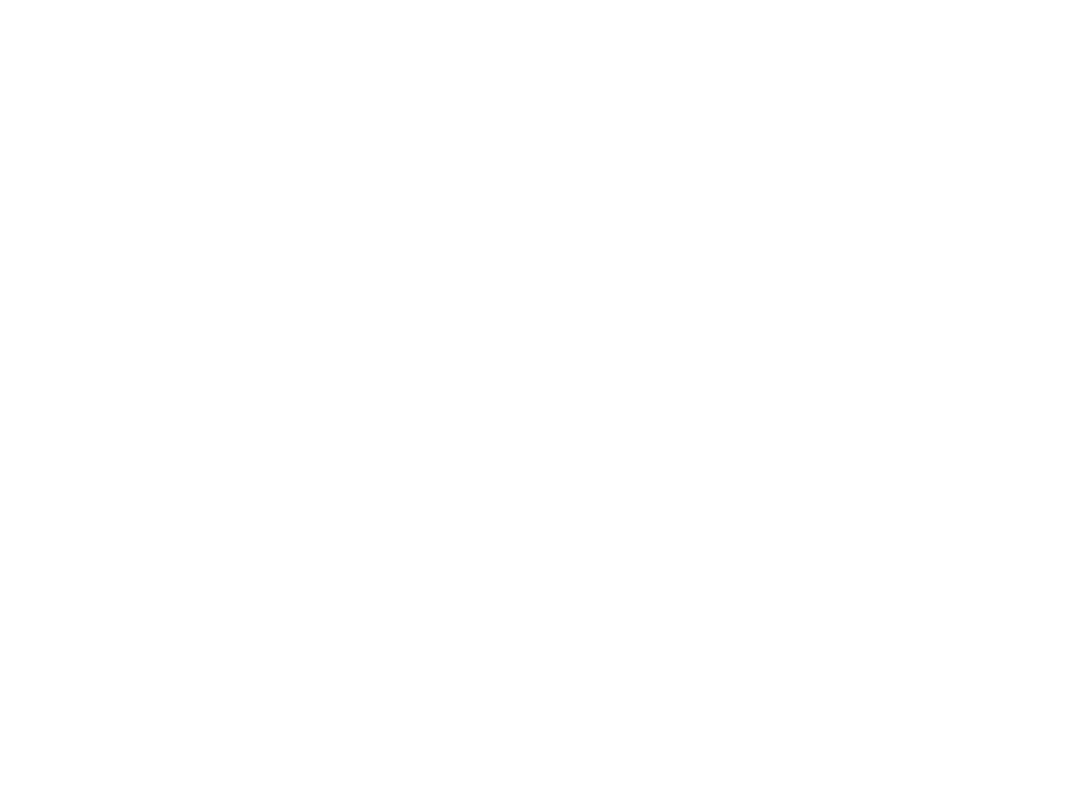

Text(0, 0.5, 'inductor current [A]')

In [11]:
duty = np.linspace(0, .99, 100)
fig, ax = plt.subplots(subplot_kw={'title':' (ideal) M(D) of Buck-Boost'})
M = buckboost.computesym(M, {D:duty})
ax.plot(duty, M)
ax.set_xlabel('Duty Cycle')
ax.set_ylabel('Conversion Ratio')
#plot again, but zoom in 
fig, ax = plt.subplots(subplot_kw={'title':'(ideal) M(D) of Buck-Boost'})
ax.plot(duty, M)
ax.set_xlabel('Duty Cycle')
ax.set_ylabel('Conversion Ratio')
ax.set_ylim(bottom=-1, top=0)
ax.set_xlim(left=0, right=.6)
ax.grid()

load_currents = [-1*el for el in [.1, .2, .5, 1, 5]]
fig, ax = plt.subplots(subplot_kw={'title':'Inductor Current of Buck Boost'})
for i in load_currents:    
    #il = i/(D-1)
    il = buckboost.computesym(iL, {iR :i, D:duty})
    ax.plot(duty, il, label='load: {:.1f}A'.format(i))
ax.legend()
ax.set_xlabel('Duty Cycle')
ax.set_xlim(left=.3, right=.5)
ax.set_ylim(bottom=0, top=10)
ax.set_ylabel('inductor current [A]')


### Part C.i) find D and iL for the given values



Answer: Just use those nice plots! 
M = Vc/Vg = -20/30 = -.66
Duty cycle looks to be about .38, from the plot
Then iL = Vc/(R*(D-1)) = -8A
Alternatively, use a solver from Sympy, see below. 


In [12]:
make_symbols()

In [13]:
given = {Vg:30, R:4, Vc:-20, fs:40e3, M:-20/30}

In [14]:
ans =buckboost.solver(given={}, want=D)
myprint(D, *ans)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 59-67: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 28: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-60: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 30: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 30: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 46-48: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 51-61: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

<IPython.core.display.Latex object>

In [15]:
buckboost.computesym(D, given)

0.4

In [16]:
ans =buckboost.solver(given={}, want=iL)
myprint(iL, *ans)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 59-67: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 28: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 28: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 52: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 49-57: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

<IPython.core.display.Latex object>

In [17]:
buckboost.computesym(iL, given)

8.333333333333334

### Part C.ii) What value of inductance will make the ripple current = 10% of average current?

In [18]:
Ts = 1/fs
buckboost.equations.add(M - Vc/Vg ) #conversion ratio M
buckboost.equations.add(2*delta_iL - Vg*D*Ts/L) #inductor current ripple
buckboost.equations.add(2*delta_vC - (Vc/R)*(1/C)*D*Ts) #capacitor voltage ripple
buckboost.equations.add(delta_iL - .1*iL) #design spec
buckboost.equations.add(delta_vC - .1*Vc) #design spec
buckboost.equations.add(iL - Vc/(R*(D-1))) #average inductor current
buckboost.showequations()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
given = {Vg:30, R:4, Vc:-20, fs:40e3, M:-20/30, delta_iL:8.333/10}

In [20]:
ans =buckboost.solver(given={}, want=L)
myprint(L, *ans)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 54: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 59-67: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 50-58: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 52: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 30: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 51: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 53: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u209b' in position 84: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 52: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u209b' in position 90: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 53-55: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u209b' in position 88: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 51: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u209b' in position 94: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 60: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 56: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 58: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 53: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 47: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 49: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 61-63: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u239b' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
    result = self._run_cell(
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_ce

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 50: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 50: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u209b' in position 76: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u209b' in position 76: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 45: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 44: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 44: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
    await result
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
    result = self._run_cell(
  File "C:\Users\eriki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
    return runn

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 73: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 48: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 44: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 44: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 58-60: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 54-64: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 39: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 49: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 49: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 47: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 66: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 39: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 41: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 43: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

<IPython.core.display.Latex object>

In [21]:
buckboost.computesym(L, given)

0.00018000720028801153

### Part C.iii) What value of capacitance will make the ripple voltage = 10% of average voltage?

In [22]:
given = {Vg:30, R:4, Vc:-20, fs:40e3, M:-20/30, delta_vC: -20/10}

In [23]:

ans =buckboost.solver(given=given, want=C)
myprint(C, *ans)
buckboost.computesym(C, given)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 56: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 28: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 52: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 51: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 56: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 50: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in st

  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
    self.io_loop.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\eriki\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\eriki\anaconda3\lib\asyncio\event

<IPython.core.display.Latex object>

1.25e-05

### Part D) Plot the transistor drain current for a switching period, dependent on L

The transistor drain current is the inductor current while its on, and zero when its not. It can be represented with 6 points: 
1. (avg - rip, 0)
2. (avg, DTs/2)
3. (avg + rip, DTs)
4. (0, DTs+epsilon) where epsilon is some nonzero fall time
5. (0, Ts)
5. (avg - rip, Ts+epsilon) where epsilon is some nonzero rise time

The expressions for the ripple amounts were included in the equations of parts (Cii) and (Ciii), and are from 
the hand analysis. The inputs are are: Vg, D, R, L, C, Ts. but we want to see the effect of only the inductance value L on current ripple. Solve for current ripple with the other inputs given. 


In [24]:

ans =buckboost.solver(given=given, want=delta_iL)
myprint(delta_iL, *ans)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 51: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 28: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 52: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 44: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 40-42: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py"

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u22c5' in position 56: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelap

Traceback (most recent call last):
  File "C:\Users\eriki\anaconda3\lib\logging\__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\eriki\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 47-53: character maps to <undefined>
Call stack:
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\eriki\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\eriki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\eriki\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
 

<IPython.core.display.Latex object>

In [25]:
buckboost.computesym(delta_iL, given={L:50e-6})

2.9999999999999996

In [26]:
rip = lambda l: buckboost.computesym(delta_iL, given = {L:l})
print(f'example ripple calculation:')
myprint(delta_iL, rip(40e-6))
avg = 8.3 #hard coded because we obtained this result earlier
duty = .4 #hard coded because we obtained this result earlier
period = 1/given[fs]
epsilon = 1e-5*period


t = np.array([0, duty*period/2, duty*period,duty*period+epsilon, period, period+epsilon])
def transistor_current(l):
    r = rip(l)
    return np.array([avg- r, avg, avg+r, 0, 0, avg-r])
#transistor current = 

example ripple calculation:


<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


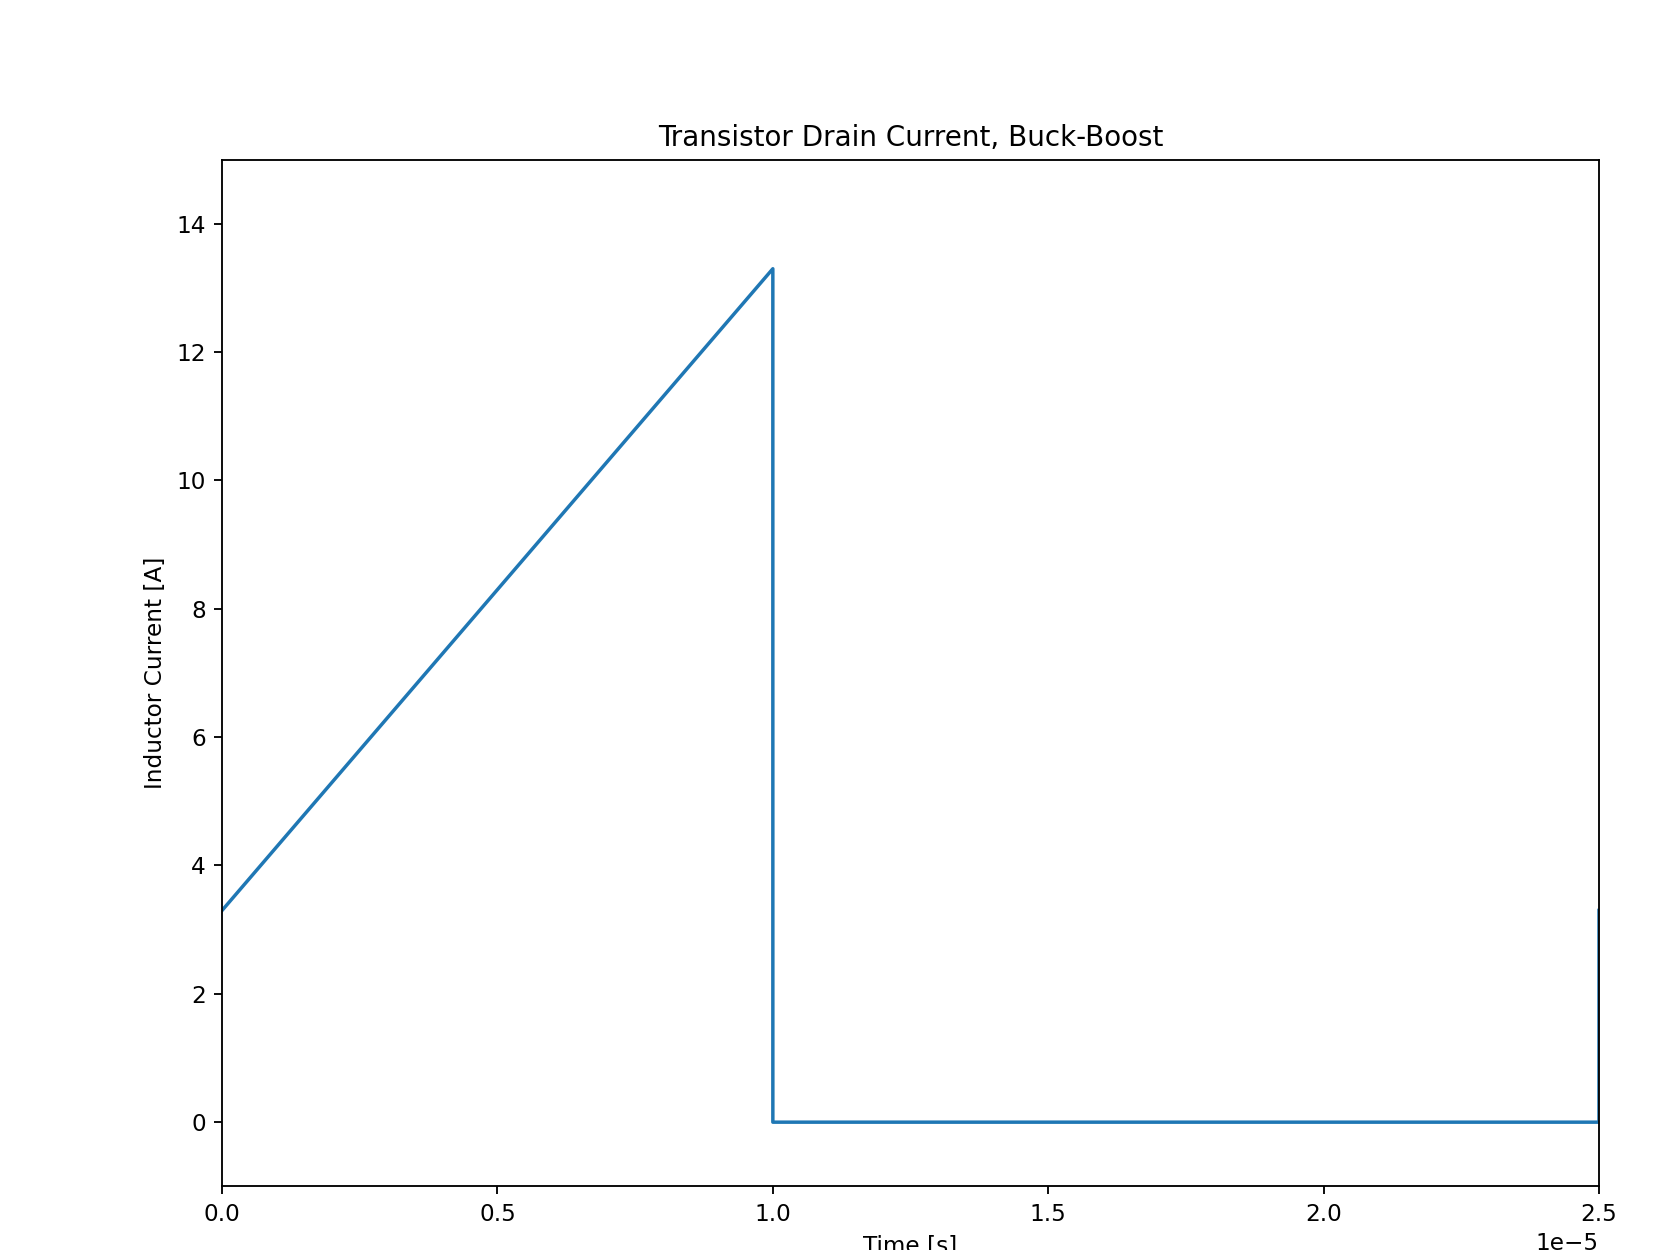

interactive(children=(FloatSlider(value=3e-05, description='inductance', max=0.0002, min=3e-05, readout_format…

In [27]:
%matplotlib notebook 
#doesn't work with inline backend
max_inductance = 200e-6
min_inductance = 30e-6
l_widget = FloatSlider(min=min_inductance, max=max_inductance, step=10e-6, readout_format='.2e')


fig, ax = plt.subplots(subplot_kw={'title':'Transistor Drain Current, Buck-Boost'})
ax.set_ylim(bottom= -1, top=15)
ax.set_xlim(left=0, right=t[-1]+epsilon)
ax.set_ylabel('Inductor Current [A]')
ax.set_xlabel('Time [s]')
l, = ax.plot(t, transistor_current(180e-6))
def g(inductance):
    
    l.set_ydata(transistor_current(inductance))
    fig.canvas.draw()

interactive_plot = interactive(g, inductance = l_widget)
interactive_plot

### Part E) Plot diode current\
The diode current is the inductor current during the off time of the transistor. 

In [28]:
t = np.array([0, duty*period, duty*period+epsilon,duty*period+(1-duty)*period/2, period, period+epsilon])
def diode_current(l):
    r = rip(l)
    return np.array([0, 0, avg+r, avg, avg-r,0])

<IPython.core.display.Javascript object>


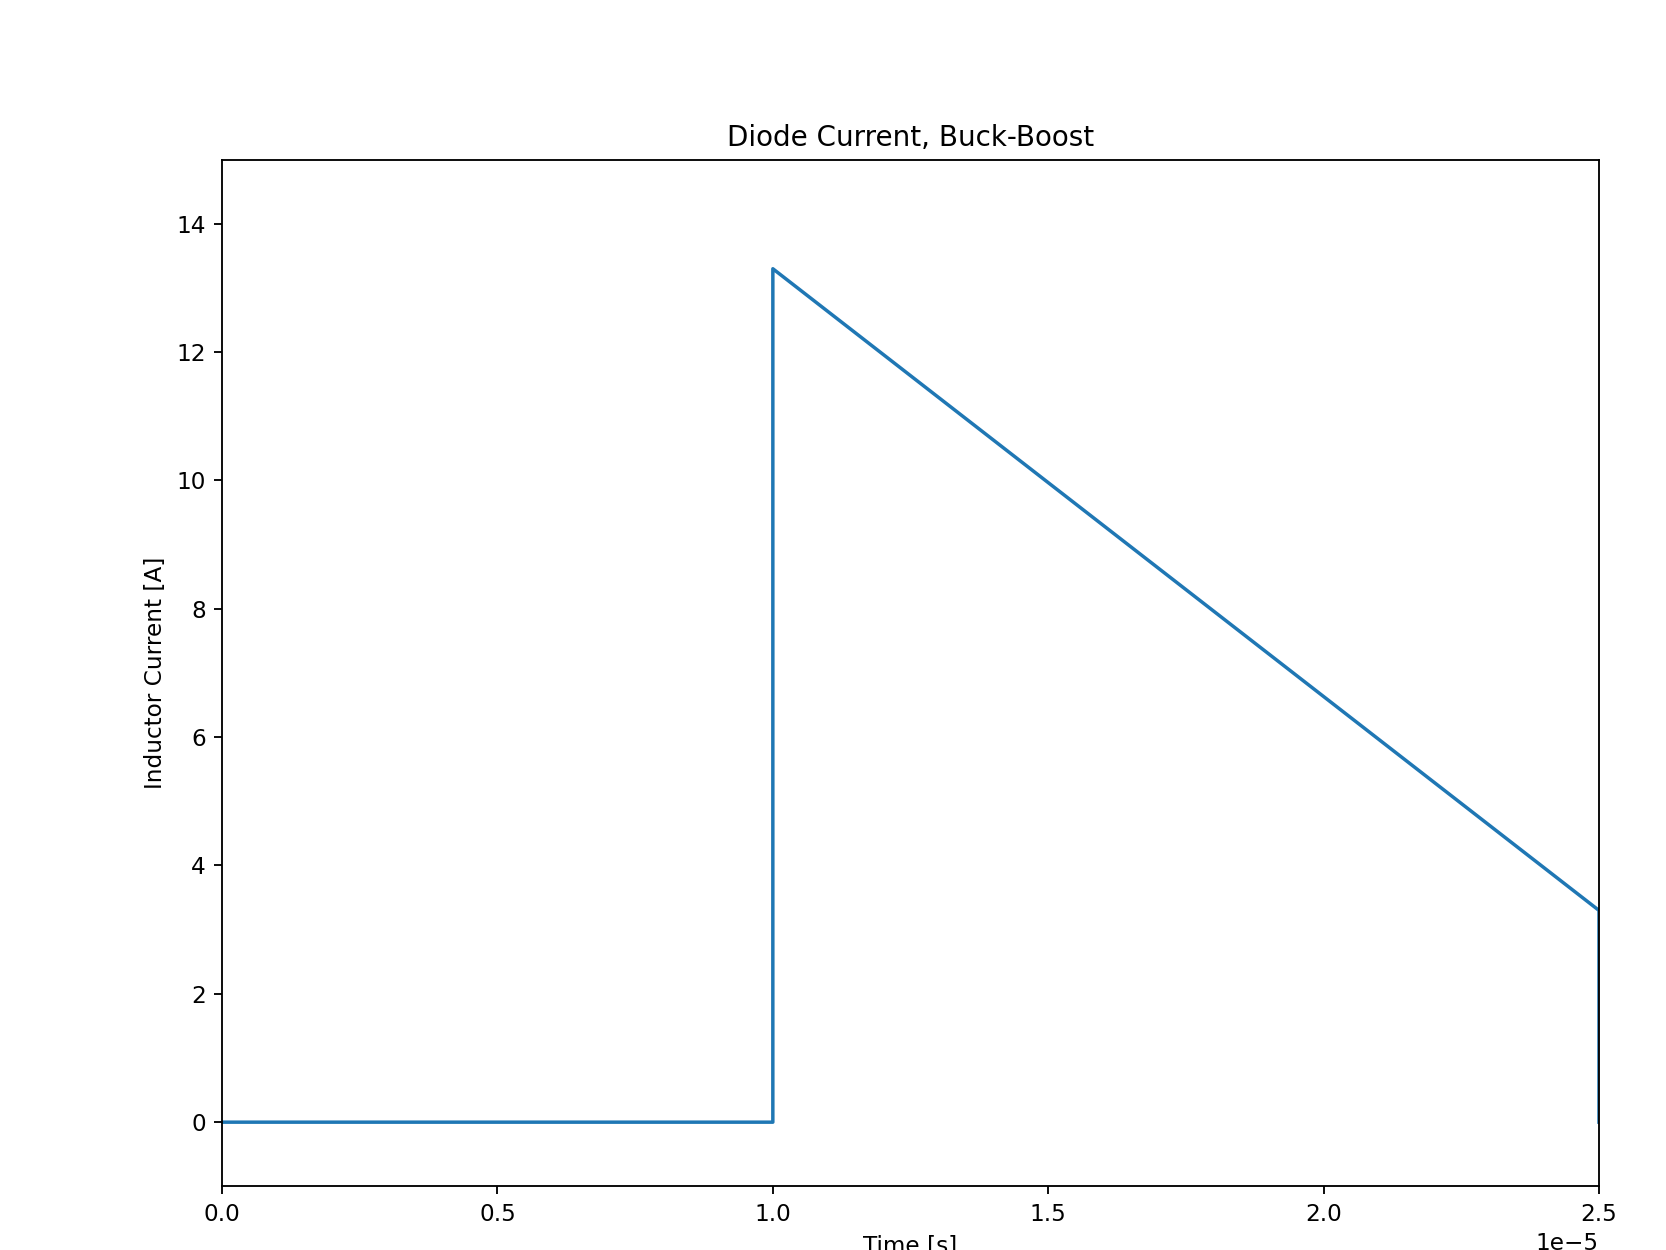

interactive(children=(FloatSlider(value=3e-05, description='inductance', max=0.0002, min=3e-05, readout_format…

In [29]:
l_widget = FloatSlider(min=min_inductance, max=max_inductance, step=10e-6, readout_format='.2e')


fig, ax = plt.subplots(subplot_kw={'title':'Diode Current, Buck-Boost'})
ax.set_ylim(bottom= -1, top=15)
ax.set_xlim(left=0, right=t[-1]+epsilon)
ax.set_ylabel('Inductor Current [A]')
ax.set_xlabel('Time [s]')
l, = ax.plot(t, diode_current(180e-6))
def h(inductance):
    
    l.set_ydata(diode_current(inductance))
    fig.canvas.draw()

interactive_plot = interactive(h, inductance = l_widget)
interactive_plot

#### Lastly, the results can be compared to a spice simulation, with the nominal 180uH:

In [30]:
raw = os.path.join(os.getcwd(), 'problem2-1.raw')
LTR = LTSpice_RawRead.LTSpiceRawRead(raw) 
Vc = LTR.get_trace("V(vc)").get_wave()
iT = LTR.get_trace("I(S1)").get_wave()
iL = LTR.get_trace("I(L1)").get_wave()
t_sim = LTR.get_trace('time').get_time_axis()

Normal access


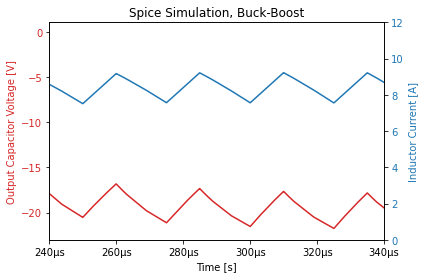

In [31]:
%matplotlib inline
subplot_kw={'title':'Spice Simulation, Buck-Boost',
           'xlabel': 'Time [s]'}
      
#fig, (ax1, ax2) = plt.subplots(2,1)
fig, ax1 = plt.subplots(subplot_kw = subplot_kw)
ax1.set_xlim(left = 240e-6, right=240e-6+4*period)
major_formatter= EngFormatter(unit='s', places=0, sep='')
ax1.xaxis.set_major_formatter(major_formatter)

color = 'tab:red'
ax2 = ax1.twinx()
ax1.plot(t_sim, Vc, label='Vout', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Output Capacitor Voltage [V]', color=color)

color = 'tab:blue'
ax2.plot(t_sim, iL, label='iL', color=color)
ax2.set_ylim(0, 12)
ax2.set_ylabel('Inductor Current [A]', color=color)
ax2.tick_params(axis='y', labelcolor=color)


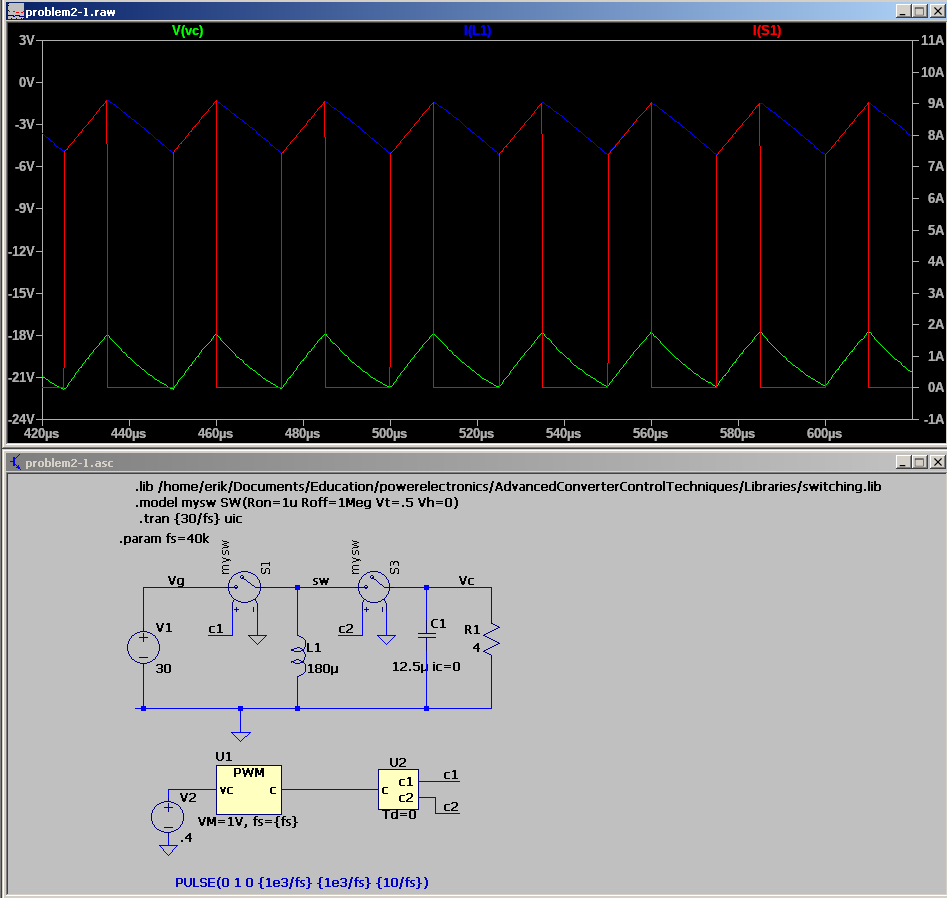